<a href="https://colab.research.google.com/github/EmmanuelMontes/Machine-Learning/blob/main/Dia1_CreditoBancoAleman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INMERSIÓN DE DATOS CON PYTHON

#**PROBLEMA DE NEGOCIO**

---

La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

In [ ]:
# Importar bibliotecas.

# Herramientas para manipulación, visualización y análisis de datos. Operaciones numéricas. Gráficos 2D.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive
import warnings

#drive.mount("/content/Drive")
warnings.filterwarnings("ignore")

In [ ]:
# Especificar que Pandas procese la visualizacion de todas las columnas del dataset cuando sean requeridas.

pd.set_option('display.max_columns',None)

# Especificar como variables globales "df_banco" y "resultados". Con el objetivo de que las funciones accedan a ellas a lo largo del proceso.

global df_banco, resultados

## Fase 1. Exploracion de datos.

### a. Carga de datos.

In [ ]:
df_banco = pd.read_csv('/content/sample_data/german_credit.csv')

### b. Analisis exploratorio.

In [ ]:
# Visualizacion de las primeras filas.

df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
# Total de valores por filas y columnas.

df_banco.shape

(1000, 21)

In [ ]:
# Visualizacion del nombre de las variables del dataset.

df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [ ]:
# Visualizacion del tipo de dato de las variables.

df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [ ]:
# Estadisticas descripticas de variables numericas.

df_banco.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


<Axes: ylabel='count'>

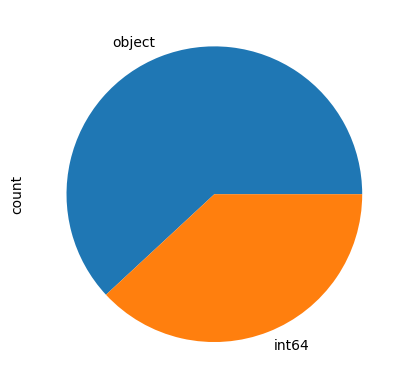

In [ ]:
# Visualizando gráfica de pastel para conocer la proporcionalidad por tipo de dato.

df_banco.dtypes.value_counts().plot.pie()

## Fase 2. Preprocesamiento de datos.

### a. Manejo de valores faltantes.

In [ ]:
# Verificacion de posibles valores nulos utilizando la media de cada variable.

df_banco.isnull().mean()*100

,0
default,0.0
account_check_status,0.0
duration_in_month,0.0
credit_history,0.0
purpose,0.0
credit_amount,0.0
savings,0.0
present_emp_since,0.0
installment_as_income_perc,0.0
personal_status_sex,0.0


### b. Codificacion de variables categoricas

In [ ]:
# Conteo de valores por variable.

for i in df_banco.columns:
    print(df_banco[i].value_counts())
    print("\n")

default
0    700
1    300
Name: count, dtype: int64


account_check_status
no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: count, dtype: int64


duration_in_month
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: count, dtype: int64


credit_history
existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no cre

In [ ]:
# Seleccionar solamente las columnas tipo 'object' o categoricas, es decir las que tienen solo texto y visualizar cada una de las categorias dentro.

columnas = list(df_banco.select_dtypes(include=['object']).columns)

for columna in columnas:
    print(f'Nombre de la columna: {columna}')
    print(list(df_banco[f'{columna}'].value_counts().index))
    print('\n')

Nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


Nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


Nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


Nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


Nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


Nombre de la columna: personal_status_sex
['male : single', 'female : divorced/separ

In [ ]:
# Creando un diccionario para codificar las variables categoricas en numericas.

# Nueva codificacion de los valores dentro de la variable.

dic = {'yes':1, 'no':0}

# Utilizando metodo map() para hacer la recodificacion.

df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)

In [ ]:
# Creacion de una funcion que permite recodificar todas las variables categoricas en un solo paso.

def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

In [ ]:
# Llamada a la funcion previa, en la que se hace la recodificacion de las variables.

procesar_datos()

In [ ]:
# Seleccionar una muestra de los datos para visualizar los cambios.

df_banco.sample(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
962,0,4,15,3,1,3556,1,3,3,3,1,2,4,29,3,2,1,3,1,0,1
632,0,2,15,3,5,1444,1,4,4,3,1,1,2,23,3,2,1,3,1,0,1
526,0,4,15,5,8,1532,4,3,4,2,1,3,3,31,3,2,1,3,1,0,1
487,0,4,24,3,1,3757,5,1,4,2,2,4,4,62,3,3,1,3,1,1,1
702,0,3,24,3,5,1377,4,1,4,2,1,2,4,47,3,3,1,3,1,1,1


In [ ]:
# Creacion de variables discretas (rangos). Investigar PORQUE ES NECESARIO ESTE PASO?????????

variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [ ]:
# Recodificacion de los valores de algunas variables que previamente habian sido cambiados.
# Ingenieria de caracteristicas o Feature Engineering.

def feature_engineering():
        """
    Realiza la ingeniería de características para el dataset bancario.
    Transforma variables categóricas y numéricas en formatos más apropiados para el análisis.

    Transformaciones realizadas:
    - Codifica el sexo y estado civil desde personal_status_sex
    - Categoriza la edad en rangos
    - Categoriza la duración del crédito en rangos
    - Categoriza el monto del crédito en rangos
    """
global df_banco

# Diccionarios para mapear el sexo (1: Masculino, 0: Femenino).
# Los valores 2,5 corresponden a hombres y 1,3,4 a mujeres en los datos originales.
dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}

# Diccionarios para mapear el estado civil (1: Casado/Divorciado, 0: Soltero/Otro).
# Los valores 3,5 corresponden a casado/divorciado y 1,2,4 a soltero/otro.
dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}

# Creación de nuevas características a partir de personal_status_sex
df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)

# Categorización de la edad en 6 rangos (1-6)
# Rangos: 18-30, 31-40, 41-50, 51-60, 61-70, 71-80
df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)

# Categorización del monto del crédito en 20 rangos (1-20)
# Rangos en unidades monetarias de 1000 desde 1 hasta 20000
df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)

# Eliminación de las columnas originales que ya han sido transformadas
df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [ ]:
# Se llama a la funcion feature_engineering() para hacer la recodificacion de las variables.

feature_engineering()

In [ ]:
df_banco.sample(5)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
962,0,4,3,1,1,3,3,1,2,4,3,2,1,3,1,0,1,0,1,1,2,4
406,0,4,5,2,1,2,4,1,4,3,3,2,2,3,2,1,1,0,1,3,2,3
834,1,3,3,5,5,4,2,1,3,1,3,2,1,2,1,0,1,1,0,1,2,3
98,0,2,5,5,5,1,4,1,4,1,3,2,1,3,1,0,1,0,1,2,3,3
610,1,1,3,6,4,5,4,1,3,2,3,2,1,3,1,0,1,1,0,1,1,1


In [ ]:
# Estadistica descriptiva del nuevo data frame.

df_banco.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.0,1.0
account_check_status,1000.0,2.577,1.257638,1.0,1.0,2.0,4.0,4.0
credit_history,1000.0,3.545,1.083120,1.0,3.0,3.0,5.0,5.0
purpose,1000.0,4.277,2.739302,1.0,2.0,4.0,5.0,10.0
savings,1000.0,3.895,1.580023,1.0,3.0,5.0,5.0,5.0
present_emp_since,1000.0,2.616,1.208306,1.0,1.0,3.0,3.0,5.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.0,4.0
other_debtors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.0,3.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.0,4.0
property,1000.0,2.358,1.050209,1.0,1.0,2.0,3.0,4.0


In [ ]:
# Creacion de histograma de la distribucion de sexos.

def analisis_exploratorio():
    # Se declara df_banco como variable global para poder acceder a ella dentro de la función
    global df_banco

    # Lista de columnas categóricas para las cuales se crearán histogramas
    histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']

    # Crea una lista enumerada de las variables, donde cada elemento es una tupla (índice, nombre_variable)
    lista_histogramas = list(enumerate(histogramas))

    # Crea una figura con un tamaño específico de 30x20 pulgadas
    plt.figure(figsize = (30, 20))
    # Agrega un título principal a la figura
    plt.title('Histogramas')

    # Itera sobre la lista enumerada de variables
    for i in lista_histogramas:
        # Crea una subfigura en una cuadrícula de 3x2 en la posición i[0]+1
        # (i[0] es el índice, se suma 1 porque subplot empieza en 1, no en 0)
        plt.subplot(3, 2, i[0]+1)

        # Crea un gráfico de barras usando seaborn
        # x = nombre de la columna (i[1])
        # data = el dataframe df_banco
        sns.countplot(x = i[1], data = df_banco)

        # Establece las etiquetas del eje x con un tamaño de fuente de 20
        plt.xlabel(i[1], fontsize=20)
        # Establece las etiquetas del eje y con un tamaño de fuente de 20
        plt.ylabel('Total', fontsize=20)

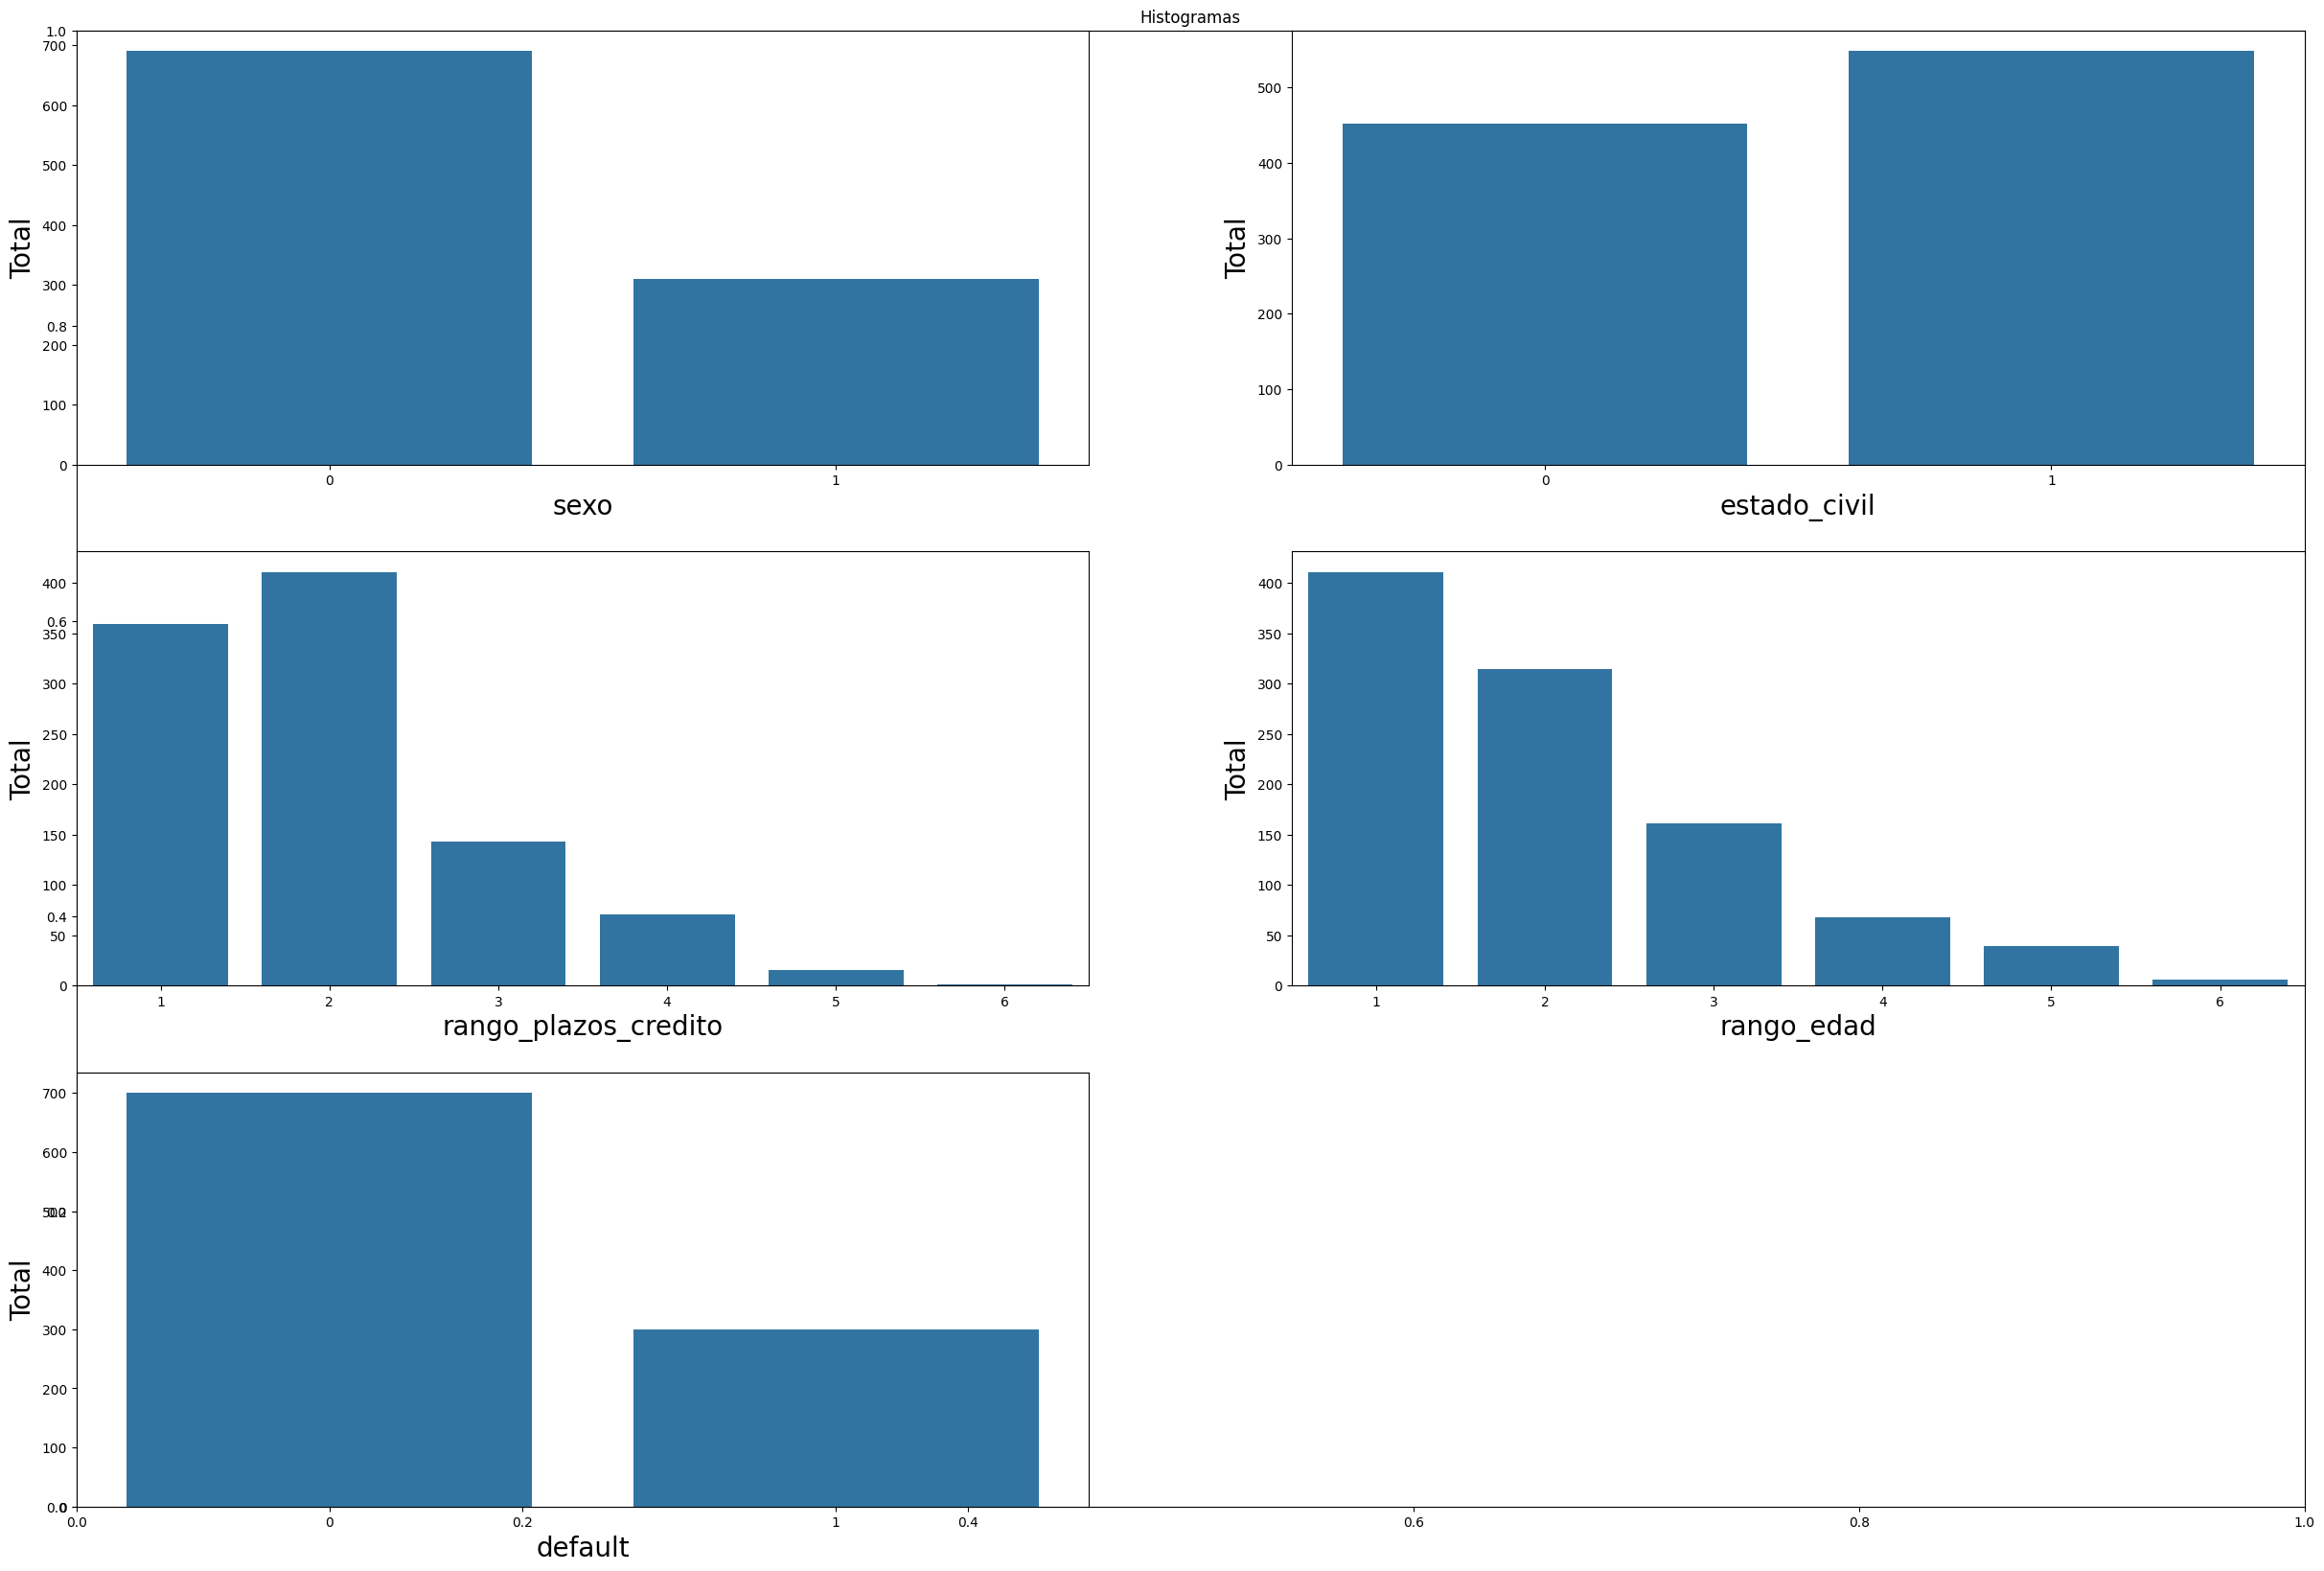

In [ ]:
# Se llama a la funcion analisis_exploratorio() para graficar.

analisis_exploratorio()

Text(0.5, 1.0, 'Matriz de Correlación \n')

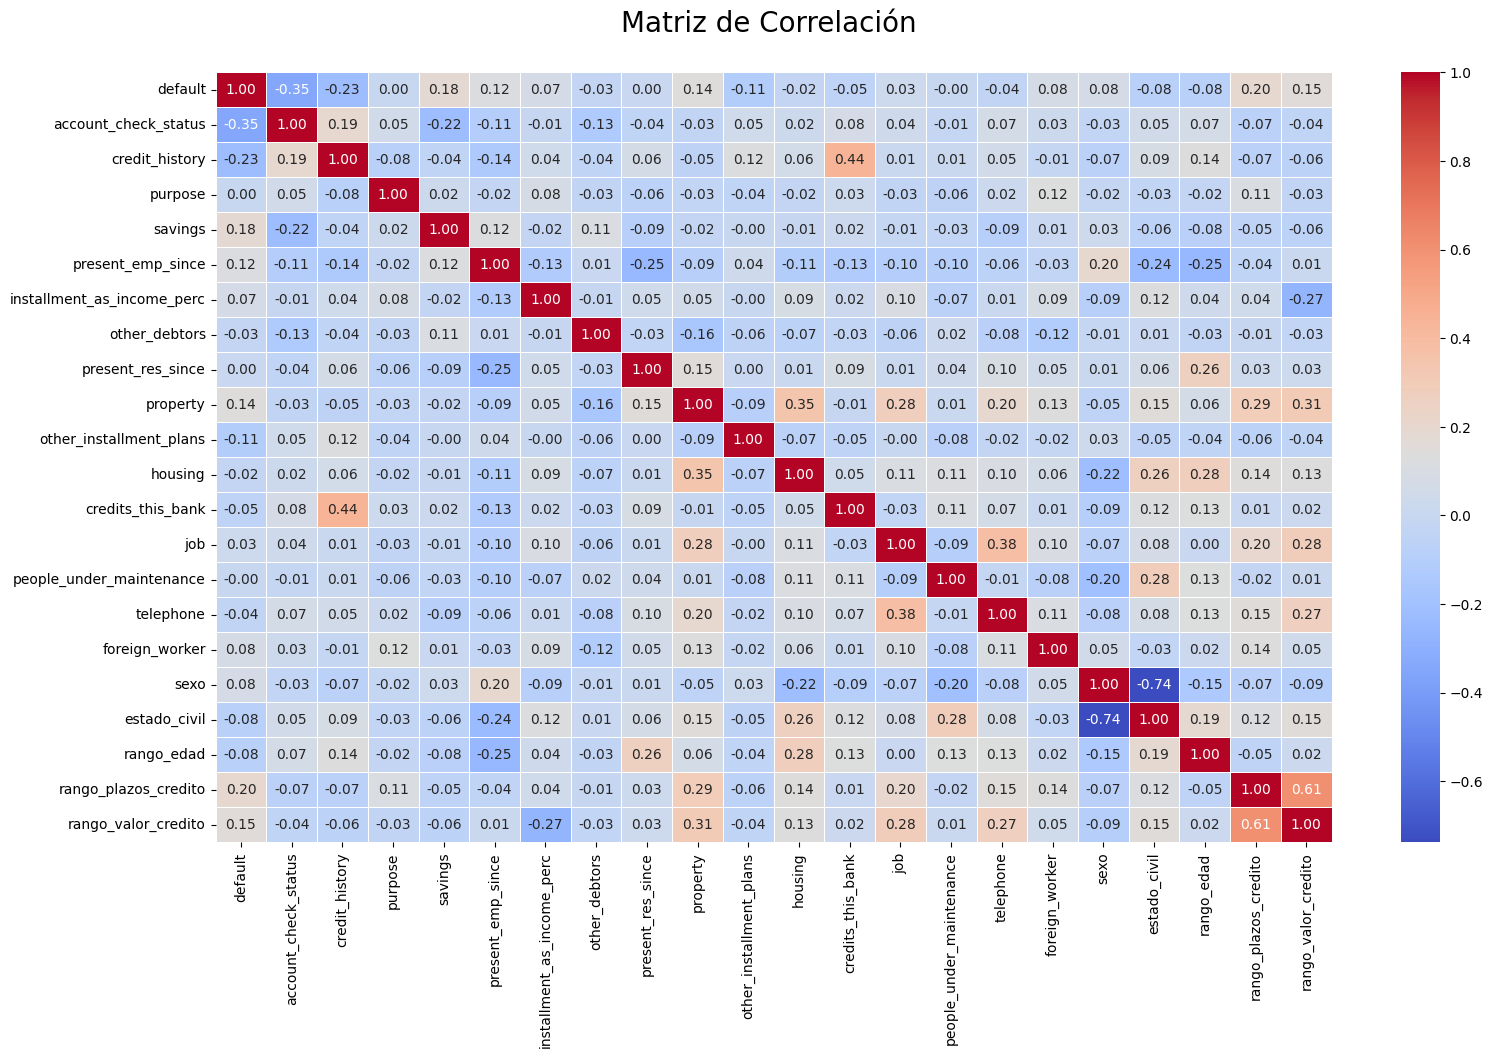

In [ ]:
# Mapa de Correlación una ves recodificadas las variables.

plt.figure(figsize = (18,10))
sns.heatmap(df_banco.corr(), linewidths = 0.7, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Matriz de Correlación \n', fontsize = 20)

## **Desafíos**

### **1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.**

**1. Análisis de Distribuciones**
- 1.1 Histograma de Sexo
    - Existe una clara predominancia de solicitantes masculinos (aproximadamente 70%).
    - Esto podría indicar un sesgo histórico en la concesión de créditos.
    - Recomendación: Evaluar políticas de inclusión financiera.

- 1.2 Histograma de Estado Civil
    - Mayor concentración de solicitantes solteros.
    - La distribución sugiere que los solteros tienen mayor propensión a solicitar créditos.
    - Implicación: Considerar productos específicos para este segmento.

- 1.3 Histograma de Rango Plazos Crédito
    - Mayor frecuencia en plazos cortos (12-24 meses).
    - Menor frecuencia en plazos largos (>48 meses).
    - Sugiere preferencia por compromisos financieros de corto plazo.

- 1.4 Histograma de Rango Edad
    - Concentración principal en rangos 30-40 y 40-50 años.
    - Baja representación de extremos (18-30 y >60 años).
    - Refleja el perfil de riesgo preferido por el banco.

- 1.5 Histograma de Default
    - Distribución desbalanceada (aproximadamente 70% buenos pagadores, 30% default).
    - Importante para definir estrategias de modelamiento.
    - Necesidad de técnicas de balanceo de clases.

**2. Análisis de Valores Atípicos y Exclusiones**
- 2.1 Registros a Excluir
    - Créditos con montos extremadamente altos (>95th percentil)
    - Solicitantes menores de 20 años o mayores de 70
    - Casos con ratio cuota/ingreso > 80%
    - Registros con duration_in_month > 60 meses

- 2.2 Justificación
    - Reducir ruido en el modelo
    - Eliminar casos no representativos
    - Mejorar la capacidad predictiva

### **2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.**

`plt.figure(figsize = (18,10))
sns.heatmap(df_banco.corr(), linewidths = 0.7, annot = True)`

### **3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial. Correlaciones Relevantes para el Modelo**

**3.1 Variables Predictivas Clave**

1. Estado de Cuenta (account_check_status)
    - Correlación -0.35 con default
    - Principal indicador temprano de riesgo

2. Historial Crediticio (credit_history)
    - Correlaciones significativas con múltiples variables
    - Indicador robusto de comportamiento financiero

3. Plazos y Montos
    - Correlación 0.61 entre plazo y monto
    - Importante para segmentación de productos

**3.2 Interacciones Secundarias**
1. Variables Socioeconómicas
    - Correlaciones moderadas con default
    - Útiles para segmentación de clientes

2. Variables de Comportamiento
    - Patrones de pago históricos
    - Relaciones bancarias existentes

### **4. Propuesta del Modelo de Machine Learning**

**4.1 Preparación de Datos**

1. Feature Engineering Adicional
    - Ratios financieros compuestos
    - Variables de interacción
    - Encoding optimizado

2. Tratamiento de Desbalance
    - SMOTE
    - Random Under-sampling
    - Combinación de técnicas

**4.2 Arquitectura de Modelamiento**

**4.2.1 Modelo Principal**

- XGBoost o LightGBM
    - Mejor manejo de variables categóricas
    - Capacidad para capturar relaciones no lineales
    - Robusto ante outliers

**4.2.2 Modelos de Respaldo**

1. Random Forest
    - Interpretabilidad
    - Robustez

2. Redes Neuronales
    - Captura de patrones complejos
    - Arquitectura personalizada

**4.3 Evaluación y Monitoreo**

**4.3.1 Métricas Principales**

- AUC-ROC
- Precisión-Recall
- Kolmogorov-Smirnov
- Gini normalizado

**4.3.2 Validación**

- Cross-validation estratificada
- Validación temporal
- Pruebas de stress

**4.4 Implementación**

**4.4.1 Pipeline de Producción**

- Preprocesamiento automático
- Actualización periódica
- Monitoreo de drift

**4.4.2 Interface de Usuario**

- API REST
- Dashboard de monitoreo
- Alertas automáticas

**4.5 Consideraciones Adicionales**

**4.5.1 Aspectos Regulatorios**

- Explicabilidad (SHAP values)
- Documentación de decisiones
- Pruebas de sesgo

**4.5.2 Mantenimiento**

- Reentrenamiento periódico
- Actualización de umbrales
- Gestión de versiones